In [5]:
# import required libraries and tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [17]:
# loading data 
data = pd.read_csv(r"C:\Users\j-salim\OneDrive - UWE Bristol\PhD - Year 1\SWBio\Data Science\data\glucose_growth_curves_48h.csv") 
data.head()

,isolate,glucose_vv,experiment_repeat,well_id,time_s,OD,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NCTC12156,1.0,1.0,A1,0.0,0.1454,NaN,NaN,NaN,NaN,NaN,NaN
1,NCTC12156,1.0,1.0,A2,0.0,0.1389,NaN,NaN,NaN,NaN,NaN,NaN
2,NCTC12156,1.0,1.0,A3,0.0,0.1269,NaN,NaN,NaN,NaN,NaN,NaN
3,NCTC12156,1.0,2.0,A1,0.0,0.1171,NaN,NaN,NaN,NaN,NaN,NaN
4,NCTC12156,1.0,2.0,A2,0.0,0.1097,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# remove NaN and verify 
data = data.drop(columns=data.columns[6:12])
data = data.dropna()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3675 entries, 0 to 3674
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   isolate            3675 non-null   object 
 1   glucose_vv         3675 non-null   float64
 2   experiment_repeat  3675 non-null   float64
 3   well_id            3675 non-null   object 
 4   time_s             3675 non-null   float64
 5   OD                 3675 non-null   float64
dtypes: float64(4), object(2)
memory usage: 201.0+ KB


In [20]:
# converting data types 
data["isolate"] = data["isolate"].astype("category")
data["well_id"] = data["well_id"].astype("category")
data["experiment_repeat"] = data["experiment_repeat"].astype("category")
data["glucose_vv"] = data["glucose_vv"].astype("category")

In [21]:
# define features and target 
feature_cols = ["isolate", "glucose_vv", "experiment_repeat", "well_id", "time_s"]
target_col = "OD"

X = data[["isolate", "glucose_vv", "experiment_repeat", "well_id", "time_s"]]
y = data["OD"]

In [22]:
# categorical and numerical columns
categorical_cols = ["isolate", "glucose_vv", "experiment_repeat", "well_id"]
numeric_cols = ["time_s"]

In [23]:
# pre-processing pipeline
preprocess = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(drop="first"), categorical_cols),
                      ("num", "passthrough", numeric_cols)])

In [24]:
print(data)

        isolate glucose_vv experiment_repeat well_id    time_s      OD
0     NCTC12156        1.0               1.0      A1       0.0  0.1454
1     NCTC12156        1.0               1.0      A2       0.0  0.1389
2     NCTC12156        1.0               1.0      A3       0.0  0.1269
3     NCTC12156        1.0               2.0      A1       0.0  0.1171
4     NCTC12156        1.0               2.0      A2       0.0  0.1097
...         ...        ...               ...     ...       ...     ...
3670    SM52892        0.0               1.0      G2  172799.6  0.6491
3671    SM52892        0.0               2.0      G1  172799.6  0.3723
3672    SM52892        0.0               2.0      G2  172799.6  0.6826
3673    SM52892        0.0               3.0      G1  172799.6  0.5165
3674    SM52892        0.0               3.0      G2  172799.6  0.7768

[3675 rows x 6 columns]


In [25]:
# train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [26]:
# RandomForestRegressor pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        random_state=42,
        n_jobs=-1))])

In [27]:
# GradientBoostingRegressor pipeline
gb_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=3,
        random_state=42))])

In [28]:
# train models
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['isolate', 'glucose_vv',
                                                   'experiment_repeat',
                                                   'well_id']),
                                                 ('num', 'passthrough',
                                                  ['time_s'])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=500,
                                           random_state=42))])

In [29]:
# predictions on test set 
rf_pred = rf_pipeline.predict(X_test)
gb_pred = gb_pipeline.predict(X_test)

In [30]:
# RandomForestRegression 
results_rf = X_test.copy()
results_rf["Actual_OD"] = y_test.values
results_rf["Predicted_OD_RF"] = rf_pred

results_rf.head()

,isolate,glucose_vv,experiment_repeat,well_id,time_s,Actual_OD,Predicted_OD_RF
2127,SM37212,0.0,1.0,G5,129599.7,1.2299,1.224752
1744,SM37212,1.0,2.0,C2,107999.8,1.3450,1.326277
2868,SM55869,0.0,1.0,G7,133199.8,1.3941,1.405515
2754,SM55869,0.0,1.0,G7,64799.9,1.2046,1.215275
1691,SM37212,1.0,2.0,C3,86399.8,1.2748,1.272826


In [31]:
# GradientBoostingRegression
results_gb = X_test.copy()
results_gb["Actual_OD"] = y_test.values
results_gb["Predicted_OD_GB"] = gb_pred

results_gb.head()

,isolate,glucose_vv,experiment_repeat,well_id,time_s,Actual_OD,Predicted_OD_GB
2127,SM37212,0.0,1.0,G5,129599.7,1.2299,1.245805
1744,SM37212,1.0,2.0,C2,107999.8,1.3450,1.320712
2868,SM55869,0.0,1.0,G7,133199.8,1.3941,1.373351
2754,SM55869,0.0,1.0,G7,64799.9,1.2046,1.222366
1691,SM37212,1.0,2.0,C3,86399.8,1.2748,1.270193


In [32]:
# Evaluate model performance
print("RandomForestRegressor")
mse_rf = mean_squared_error (y_test, rf_pred)
rmse_rf = mse_rf**0.5
print("RMSE:", rmse_rf)
print("R²:", r2_score(y_test, rf_pred))

print("GradientBoostingRegressor")
mse_gb = mean_squared_error(y_test, gb_pred)
rmse_gb = mse_gb**0.5
print("RMSE:", rmse_gb)
print("R²:", r2_score(y_test, gb_pred))

RandomForestRegressor
RMSE: 0.044885123875027626
R²: 0.989075981109468
GradientBoostingRegressor
RMSE: 0.0663139000647709
R²: 0.9761555819628124


In [37]:
# cross validation 
def cross_val_metrics(model, X, y, cv=5):
    # RMSE (use negative MSE and take sqrt)
    neg_mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-neg_mse)
    
    # R² scores
    r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    
    print(f"Cross-Validation (5-fold) Results:")
    print(f"RMSE: {rmse_scores.mean():.4f} ± {rmse_scores.std():.4f}")
    print(f"R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    return rmse_scores, r2_scores

# Example usage
cross_val_metrics(rf_pipeline, X_train, y_train)
cross_val_metrics(gb_pipeline, X_train, y_train)


Cross-Validation (5-fold) Results:
RMSE: 0.0454 ± 0.0034
R²: 0.9883 ± 0.0016
Cross-Validation (5-fold) Results:
RMSE: 0.0589 ± 0.0047
R²: 0.9804 ± 0.0029


(array([0.05457322, 0.05354001, 0.06072143, 0.06670446, 0.05878172]),
 array([0.98389715, 0.98256641, 0.97933484, 0.97556174, 0.98050115]))

In [34]:
# predict OD 
def predict_OD(model, isolate, glucose, repeat, well, time_s):
    row = pd.DataFrame([{
        "isolate": isolate,
        "glucose_vv": glucose,
        "experiment_repeat": repeat,
        "well_id": well,
        "time_s": time_s}])
    return model.predict(row)[0]

predict_OD(rf_pipeline, "NCTC12156", 1, 1, "A1", 18000)

np.float64(0.12672940054399975)

In [35]:
def predict_OD(model, isolate, glucose, repeat, well, time_s):
    row = pd.DataFrame([{
        "isolate": isolate,
        "glucose_vv": glucose,
        "experiment_repeat": repeat,
        "well_id": well,
        "time_s": time_s}])
    return model.predict(row)[0]

predict_OD(rf_pipeline, "SM52892", 1, 1, "B1", 18000)

np.float64(0.229172202008)

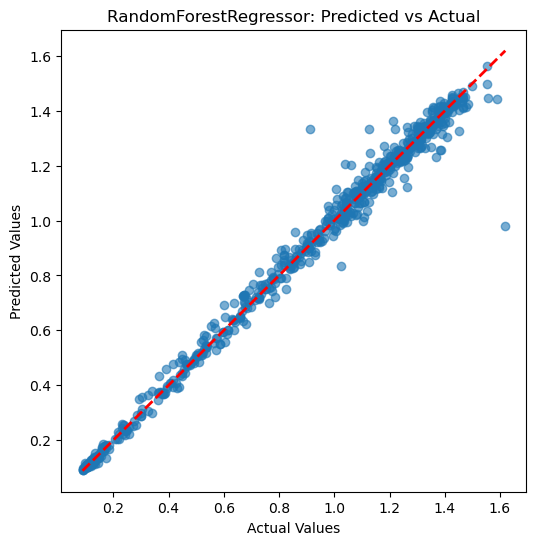

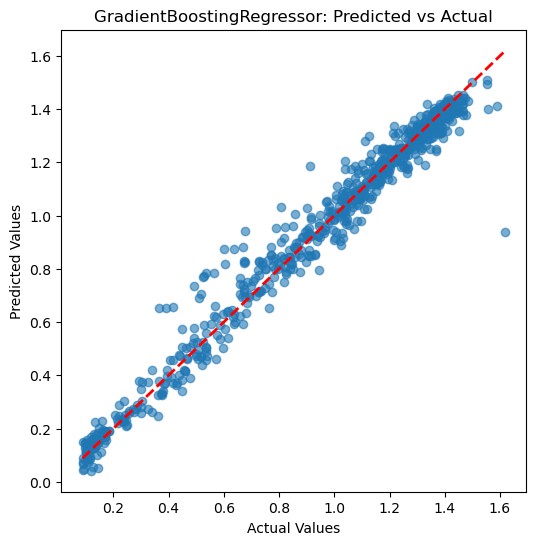

In [36]:
# visualise predictions vs actual OD
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.show()

# Predictions
rf_pred = rf_pipeline.predict(X_test)
gb_pred = gb_pipeline.predict(X_test)

# Plot
plot_predictions(y_test, rf_pred, "RandomForestRegressor")
plot_predictions(y_test, gb_pred, "GradientBoostingRegressor")